In [3]:
%pip install leafmap
%pip install rasterio
%pip install localtileserver # Need to visualize a rather large  raster?
%pip install segment-geospatial
%pip install rioxarray

In [4]:
import leafmap
import rasterio
import os
from samgeo import SamGeo, tms_to_geotiff

The image should has no more than three bands.

In [10]:
url = "https://drive.google.com/file/d/1KqHJLezzCJ1rmTKar8LPyL0ul0RH84bL/view?usp=share_link"
leafmap.download_file(url, output="image.tif", overwrite=True)

Downloading...
From: https://drive.google.com/uc?id=1KqHJLezzCJ1rmTKar8LPyL0ul0RH84bL
To: /content/image.tif
100%|██████████| 104M/104M [00:01<00:00, 94.3MB/s]


'/content/image.tif'

In [11]:
m = leafmap.Map( #height="600px"
                )
m.add_basemap("SATELLITE")
m.add_raster("image.tif", layer_name="Image")
#m.add_layer_manager()
m

Map(center=[43.125702000000004, -116.786674], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…

In [12]:
sam = SamGeo(
    model_type="vit_h",
   # automatic=False,
    sam_kwargs=None,
)

In [13]:
image="/content/image.tif"
sam.set_image(image)

AttributeError: 'SamGeo' object has no attribute 'predictor'

In [ ]:
import torch
torch.cuda.empty_cache() # Release all unoccupied cached memory currently held by the caching allocator so that those can be used in other GPU application and visible in nvidia-smi.

In [15]:
sam_kwargs = {
    "points_per_side": 16,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 80,
}

sam = SamGeo(
    model_type="vit_h",
    #model_type="vit_b",
    sam_kwargs=sam_kwargs,
)

In [18]:
#sam.generate("image.tif", output="mask.tif", foreground=True)
sam.generate("image.tif", output="mask.tif", foreground=True, batch=True, batch_sample_size= (1024, 1024) )

100%|██████████| 40/40 [10:53<00:00, 16.33s/it]


In [ ]:
m =sam.generate("image.tif", output="mask.tif", foreground=True)
print(type(m))

<class 'NoneType'>


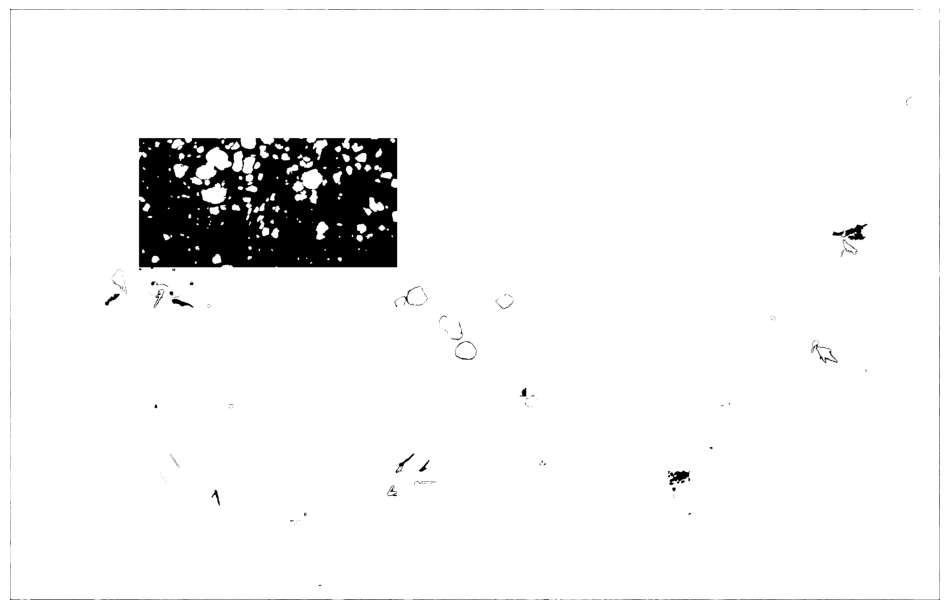

In [25]:
sam.show_masks( #cmap="binary_r"
               )

In [26]:
sam.tiff_to_vector( "mask.tif", "mask.gpkg")

In [27]:
from google.colab import files




gpkg_path = '/content/mask.gpkg'



files.download(gpkg_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: string indices must be integers

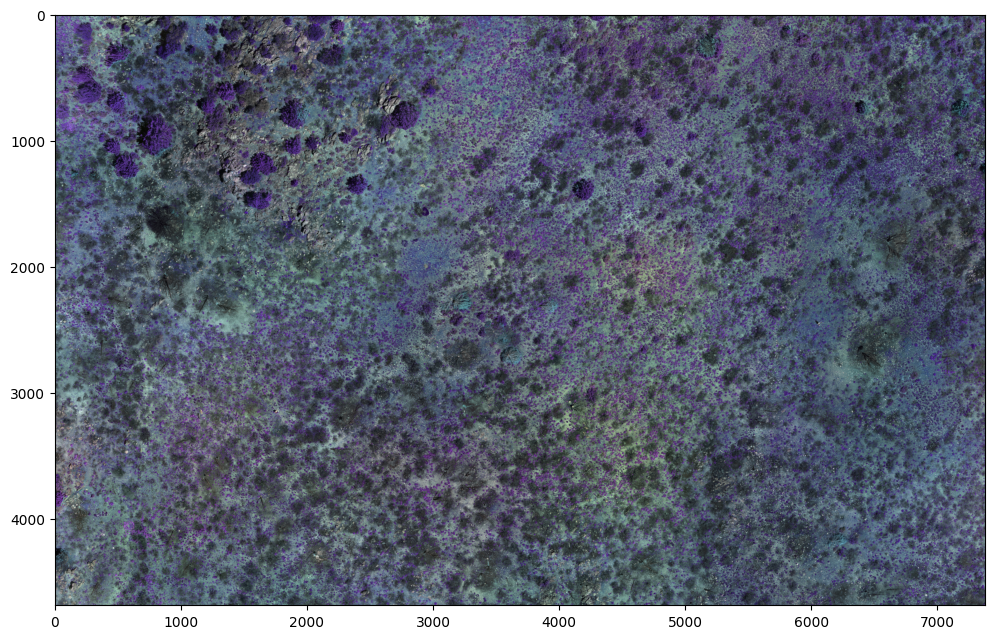

In [20]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")

In [ ]:
sam.tiff_to_vector("annotations.tif", "annotations.shp")

sam.tiff_to_vector( "annotations.tif", "annotations.gpkg")

In [ ]:
from google.colab import files

# Specify the file path
shp_path = '/content/annotations.shp'
shx_path = '/content/annotations.shx'
dbf_path = '/content/annotations.dbf'
prj_path = '/content/annotations.prj'
cpg_path = '/content/annotations.cpg'

gpkg_path = '/content/annotations.gpkg'

# Download the file
files.download(shp_path)
files.download(shx_path)
files.download(dbf_path)
files.download(prj_path)
files.download(cpg_path)
files.download(gpkg_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
print(os.listdir('/content'))

['.config', 'annotations.shp', 'annotations.cpg', 'annotations.shx', 'mask.tif', 'annotations.dbf', 'annotations.tif', 'annotations.prj', 'annotations.gpkg', 'image.tif', 'sample_data']


In [ ]:
#m.add_raster("mask.tif", layer_name="Mask", cmap="terrain" # , cmap="Blues", nodata=0 , opacity=1             )
m.add_raster("annotations.tif", layer_name="annotations"#, cmap="terrain" # , cmap="Blues", nodata=0 , opacity=1
             )
m

Map(bottom=98507744.0, center=[43.126369999999994, -116.7855965], controls=(ZoomControl(options=['position', '…

In [24]:
leafmap.image_comparison(
    image,
    "annotations.tif",


    label1="Image",
    label2="Image Segmentation",
)